<a href="https://colab.research.google.com/github/Ximena5745/Developer/blob/main/Analisis_Cartera%20Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar el dataset
file_path = '/content/Vanti Listo 31-10-2024.xlsx'
data = pd.read_excel(file_path)

In [11]:
# Tamaño del dataset
print(f"Tamaño del dataset: {data.shape}")

Tamaño del dataset: (42992, 27)


In [5]:
# Análisis Exploratorio de Datos
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
  ï»¿Rango mora Clase vencimiento Concepto Consolidado  Restriccion  \
0     4. 91-180           Vencida          Vanti Listo          NaN   
1     4. 91-180           Vencida          Vanti Listo          NaN   
2    5. 181-360           Vencida          Vanti Listo          NaN   
3    5. 181-360           Vencida          Vanti Listo          NaN   
4    5. 181-360           Vencida          Vanti Listo          NaN   

  Valor total  Cod Sociedad  Cuenta Contrato  CUOTAS_VENCIDA  Dias mora  \
0   558101,67            15         62019655               2        133   
1   399899,68            15         64157216               1        178   
2      650000            15         64226498               1        206   
3  1602999,65            15         63100012               1        301   
4     1299800            15         64054133               1        339   

   DIAS_MORA_MAX  ... Num doc pp Numero Doc Fin NUMERO_DOCUMENTO Rango_mora_2  \
0            

In [6]:
# Mostrar información general del dataset
print("\nInformación general del dataset:")
data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42992 entries, 0 to 42991
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ï»¿Rango mora           42992 non-null  object 
 1   Clase vencimiento       42992 non-null  object 
 2   Concepto Consolidado    42992 non-null  object 
 3   Restriccion             0 non-null      float64
 4   Valor total             42992 non-null  object 
 5   Cod Sociedad            42992 non-null  int64  
 6   Cuenta Contrato         42992 non-null  int64  
 7   CUOTAS_VENCIDA          42992 non-null  int64  
 8   Dias mora               42992 non-null  int64  
 9   DIAS_MORA_MAX           42992 non-null  int64  
 10  Estrato                 42973 non-null  object 
 11  Estrato (grupo)         42973 non-null  object 
 12  Estrato (grupo) 1       42973 non-null  object 
 13  F venc                  42992 non-null  object 
 14  Fech

In [7]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())



Valores nulos por columna:
ï»¿Rango mora                 0
Clase vencimiento             0
Concepto Consolidado          0
Restriccion               42992
Valor total                   0
Cod Sociedad                  0
Cuenta Contrato               0
CUOTAS_VENCIDA                0
Dias mora                     0
DIAS_MORA_MAX                 0
Estrato                      19
Estrato (grupo)              19
Estrato (grupo) 1            19
F venc                        0
Fecha total                   0
Fecha Venc Min Fact           0
FEcha_COntab_orig             0
Num doc pp                 2337
Numero Doc Fin                0
NUMERO_DOCUMENTO              0
Rango_mora_2                  0
REFERENCIA_ADICIONAL          0
Sit Suministro               19
Sit Suministro (grupo)        0
TOTAL fin                     0
TOTAL pp                   2337
Valor millones                0
dtype: int64


In [8]:
# Renombrar columnas para facilitar el análisis (eliminar espacios y caracteres especiales)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('ï»¿', '')

# Renombrar la columna para corregir el error tipográfico
data.rename(columns={'FEcha_COntab_orig': 'Fecha_Contab_orig'}, inplace=True)



In [9]:
# Mostrar nombres ajustados
print("Nombres de columnas ajustados:")
print(data.columns)

Nombres de columnas ajustados:
Index(['Rango_mora', 'Clase_vencimiento', 'Concepto_Consolidado',
       'Restriccion', 'Valor_total', 'Cod_Sociedad', 'Cuenta_Contrato',
       'CUOTAS_VENCIDA', 'Dias_mora', 'DIAS_MORA_MAX', 'Estrato',
       'Estrato_grupo', 'Estrato_grupo_1', 'F_venc', 'Fecha_total',
       'Fecha_Venc_Min_Fact', 'Fecha_Contab_orig', 'Num_doc_pp',
       'Numero_Doc_Fin', 'NUMERO_DOCUMENTO', 'Rango_mora_2',
       'REFERENCIA_ADICIONAL', 'Sit_Suministro', 'Sit_Suministro_grupo',
       'TOTAL_fin', 'TOTAL_pp', 'Valor_millones'],
      dtype='object')


In [12]:
# Lista de columnas a ajustar
columns_to_fix = ['Estrato', 'Estrato_grupo', 'Estrato_grupo_1']

# Reemplazar "Ã©" por "e" en las columnas especificadas
for col in columns_to_fix:
    if col in data.columns:
        # Reemplazar "Ã©" por "é" en las columnas, sin afectar otras partes del texto
        data[col] = data[col].str.replace('Ã©', 'e', regex=False)

# Ver los primeros 15 registros de las columnas ajustadas
print(data[columns_to_fix].head(15))


                Estrato        Estrato_grupo      Estrato_grupo_1
0   Domestico estrato 2  Domestico estrato 2  Domestico estrato 2
1   Domestico estrato 3  Domestico estrato 3  Domestico estrato 3
2   Domestico estrato 2  Domestico estrato 2  Domestico estrato 2
3   Domestico estrato 2  Domestico estrato 2  Domestico estrato 2
4   Domestico estrato 2  Domestico estrato 2  Domestico estrato 2
5   Domestico estrato 2  Domestico estrato 2  Domestico estrato 2
6   Domestico estrato 4  Domestico estrato 4  Domestico estrato 4
7   Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
8   Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
9   Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
10  Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
11  Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
12  Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
13  Domestico estrato 1  Domestico estrato 1  Domestico estrato 1
14  Domest

In [13]:
# Convertir columnas de fechas
date_columns = ['F_venc', 'Fecha_total', 'Fecha_Venc_Min_Fact', 'Fecha_Contab_orig']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Formatear las fechas para que aparezcan solo en formato aaaa-mm-dd
for col in date_columns:
    data[col] = data[col].dt.strftime('%Y-%m-%d')

# Ver los primeros registros de las columnas ajustadas
print(data[date_columns].head(20))


   F_venc Fecha_total Fecha_Venc_Min_Fact Fecha_Contab_orig
0     NaN  2024-06-20          2024-06-20        2024-06-06
1     NaN  2024-06-05          2024-06-05        2024-06-19
2     NaN  2024-08-04          2024-08-04        2024-10-21
3     NaN  2024-04-01          2024-04-01        2023-12-20
4     NaN  2023-11-27          2023-11-27        2023-11-30
5     NaN  2024-04-01          2024-04-01        2023-12-18
6     NaN  2023-12-12          2023-12-12        2023-11-24
7     NaN  2022-08-23          2022-08-23        2022-06-08
8     NaN  2023-03-21          2023-03-21        2023-05-03
9     NaN  2022-09-22          2022-09-22        2022-09-09
10    NaN  2023-02-22          2023-02-22        2023-08-02
11    NaN  2023-05-15          2023-05-15        2023-04-30
12    NaN  2022-12-08          2022-12-08        2022-07-31
13    NaN  2022-11-03          2022-11-03        2022-02-24
14    NaN  2022-01-12          2022-01-12        2022-11-18
15    NaN  2023-08-24          2023-08-2

<ipython-input-13-f51fa8e4dd42>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
<ipython-input-13-f51fa8e4dd42>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [14]:
# Manejo de valores nulos
# Eliminar la columna 'Restriccion' (todos los valores nulos)
if 'Restriccion' in data.columns:
    data.drop(columns=['Restriccion'], inplace=True)

In [15]:
# Copiar datos originales para preservar el dataset inicial
data_original = data.copy()

# Definir columnas tipo moneda y enteras (con nombres ajustados)
currency_columns = ['Valor_total', 'TOTAL_fin', 'TOTAL_pp', 'Valor_millones']
integer_columns = ['Cod_Sociedad', 'Cuenta_Contrato', 'CUOTAS_VENCIDA', 'Dias_mora',
                   'DIAS_MORA_MAX', 'Num_doc_pp', 'Numero_Doc_Fin', 'NUMERO_DOCUMENTO',
                   'Sit_Suministro']

# Procesar columnas tipo moneda
for col in currency_columns:
    # Reemplazar comas por puntos y eliminar caracteres no numéricos excepto los separadores de decimales
    data[col] = data[col].astype(str).str.replace(r'[^\d,.-]', '', regex=True) \
                         .str.replace(',', '.', regex=False)  # Reemplazar comas por puntos para decimales
    # Convertir a tipo float y reemplazar valores nulos por 0.0
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0.0)

# Procesar columnas enteras
for col in integer_columns:
    # Eliminar caracteres no numéricos y convertir a tipo int, reemplazando valores nulos por 0
    data[col] = pd.to_numeric(
        data[col].astype(str).str.replace(r'[^\d]', '', regex=True),
        errors='coerce'
    ).fillna(0).astype(int)

print(data[currency_columns].head(10))
print(data[integer_columns].head(10))



   Valor_total   TOTAL_fin  TOTAL_pp  Valor_millones
0    558101.67   558101.67       0.0    5.581017e+07
1    399899.68   399899.68       0.0    3.998997e+07
2    650000.00   650000.00       0.0    6.500000e-01
3   1602999.65  1602999.65       0.0    1.603000e+08
4   1299800.00  1299800.00       0.0    1.299800e+04
5    386404.51   386404.51       0.0    3.864045e+07
6   6276650.00  6276650.00       0.0    6.276650e+05
7    570985.80   570985.80       0.0    5.709858e+06
8   1164037.00  1164037.00       0.0    1.164037e+06
9   2170083.65  2170083.65       0.0    2.170084e+08
   Cod_Sociedad  Cuenta_Contrato  CUOTAS_VENCIDA  Dias_mora  DIAS_MORA_MAX  \
0            15         62019655               2        133            133   
1            15         64157216               1        178            178   
2            15         64226498               1        206              0   
3            15         63100012               1        301            301   
4            15         640

In [16]:
# Diccionario de mapeo para la homologación de 'Cod_Sociedad' a 'Codigo_sociedad'
homologacion_dict = {
    15: 'Bogotá',
    18: 'Santander',
    294: 'Cesar',
    24: 'Cundinamarca-Boyaca'
}

# Crear la nueva columna 'Codigo_sociedad' usando el diccionario de mapeo
data['Codigo_sociedad'] = data['Cod_Sociedad'].map(homologacion_dict).fillna('Otro')

# Verificar los primeros registros de la nueva columna
print(data[['Cod_Sociedad', 'Codigo_sociedad']].head(20))


    Cod_Sociedad Codigo_sociedad
0             15          Bogotá
1             15          Bogotá
2             15          Bogotá
3             15          Bogotá
4             15          Bogotá
5             15          Bogotá
6             15          Bogotá
7             15          Bogotá
8             15          Bogotá
9             15          Bogotá
10            15          Bogotá
11            15          Bogotá
12            15          Bogotá
13            15          Bogotá
14            15          Bogotá
15            15          Bogotá
16            15          Bogotá
17            15          Bogotá
18            15          Bogotá
19            15          Bogotá


In [17]:
# Diccionario de mapeo de Rango_mora a Clasificación de gestión de cartera
clasificacion_dict = {
    '1. 0-30': 'Prevención',
    '2. 31-60': 'Contención',
    '3. 61-90': 'Contención',
    '4. 91-180': 'Recuperación',
    '5. 181-360': 'Recuperación',
    '6. >360': 'Recuperación'
}

# Crear la nueva columna 'Clasificación de gestión de cartera'
data['Clasificación_gestión_de_cartera'] = data['Rango_mora'].map(clasificacion_dict).fillna('No clasificado')

# Verificar los primeros registros
print(data[['Rango_mora', 'Clasificación_gestión_de_cartera']].head(20))


    Rango_mora Clasificación_gestión_de_cartera
0    4. 91-180                     Recuperación
1    4. 91-180                     Recuperación
2   5. 181-360                     Recuperación
3   5. 181-360                     Recuperación
4   5. 181-360                     Recuperación
5   5. 181-360                     Recuperación
6   5. 181-360                     Recuperación
7      6. >360                     Recuperación
8      6. >360                     Recuperación
9      6. >360                     Recuperación
10     6. >360                     Recuperación
11     6. >360                     Recuperación
12     6. >360                     Recuperación
13     6. >360                     Recuperación
14     6. >360                     Recuperación
15     6. >360                     Recuperación
16     6. >360                     Recuperación
17     6. >360                     Recuperación
18     6. >360                     Recuperación
19     6. >360                     Recup

In [18]:
# Verificar valores nulos restantes
print("\nValores nulos restantes por columna:")
print(data.isnull().sum())



Valores nulos restantes por columna:
Rango_mora                             0
Clase_vencimiento                      0
Concepto_Consolidado                   0
Valor_total                            0
Cod_Sociedad                           0
Cuenta_Contrato                        0
CUOTAS_VENCIDA                         0
Dias_mora                              0
DIAS_MORA_MAX                          0
Estrato                               19
Estrato_grupo                         19
Estrato_grupo_1                       19
F_venc                              2337
Fecha_total                            0
Fecha_Venc_Min_Fact                    0
Fecha_Contab_orig                      0
Num_doc_pp                             0
Numero_Doc_Fin                         0
NUMERO_DOCUMENTO                       0
Rango_mora_2                           0
REFERENCIA_ADICIONAL                   0
Sit_Suministro                         0
Sit_Suministro_grupo                   0
TOTAL_fin          

In [19]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe(include='all'))


Estadísticas descriptivas:
       Rango_mora Clase_vencimiento Concepto_Consolidado   Valor_total  \
count       42992             42992                42992  4.299200e+04   
unique          6                 1                    1           NaN   
top       1. 0-30           Vencida          Vanti Listo           NaN   
freq        12941             42992                42992           NaN   
mean          NaN               NaN                  NaN  1.687011e+05   
std           NaN               NaN                  NaN  5.399496e+05   
min           NaN               NaN                  NaN -8.000000e+06   
25%           NaN               NaN                  NaN  2.855738e+04   
50%           NaN               NaN                  NaN  5.766008e+04   
75%           NaN               NaN                  NaN  1.144420e+05   
max           NaN               NaN                  NaN  8.120203e+06   

        Cod_Sociedad  Cuenta_Contrato  CUOTAS_VENCIDA     Dias_mora  \
count   4299

In [ ]:
# Descripción estadística de las columnas numéricas
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(data.describe())



Estadísticas descriptivas de las columnas numéricas:
        Valor_total  Cod_Sociedad  Cuenta_Contrato  CUOTAS_VENCIDA  \
count  4.299200e+04  42992.000000     4.299200e+04    42992.000000   
mean   1.687011e+05     58.018934     6.239794e+07        2.663728   
std    5.399496e+05     99.779519     1.016636e+06        1.697450   
min   -8.000000e+06     15.000000     6.000304e+07        1.000000   
25%    2.855738e+04     15.000000     6.166698e+07        1.000000   
50%    5.766008e+04     15.000000     6.252233e+07        2.000000   
75%    1.144420e+05     18.000000     6.316390e+07        4.000000   
max    8.120203e+06    294.000000     6.423268e+07       15.000000   

          Dias_mora  DIAS_MORA_MAX    Num_doc_pp  Numero_Doc_Fin  \
count  42992.000000   42992.000000  4.299200e+04    4.299200e+04   
mean     123.507397      24.780913  1.229523e+11    1.327857e+10   
std      145.407595     121.588150  2.947908e+10    1.340834e+09   
min        1.000000       0.000000  0.00000

In [ ]:
# Descripción de las columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nDescripción de las columnas categóricas:")
for col in categorical_columns:
    print(f"\nColumna: {col}")
    print(data[col].value_counts())


Descripción de las columnas categóricas:

Columna: Rango_mora
Rango_mora
1. 0-30       12941
4. 91-180      9257
5. 181-360     7307
2. 31-60       6465
3. 61-90       4405
6. >360        2617
Name: count, dtype: int64

Columna: Clase_vencimiento
Clase_vencimiento
Vencida    42992
Name: count, dtype: int64

Columna: Concepto_Consolidado
Concepto_Consolidado
Vanti Listo    42992
Name: count, dtype: int64

Columna: Estrato
Estrato
Domestico estrato 2    19625
Domestico estrato 1    14193
Domestico estrato 3     8071
Domestico estrato 4      881
Domestico estrato 5      155
Domestico estrato 6       48
Name: count, dtype: int64

Columna: Estrato_grupo
Estrato_grupo
Domestico estrato 2    19625
Domestico estrato 1    14193
Domestico estrato 3     8071
Domestico estrato 4      881
Domestico estrato 5      155
Domestico estrato 6       48
Name: count, dtype: int64

Columna: Estrato_grupo_1
Estrato_grupo_1
Domestico estrato 2    19625
Domestico estrato 1    14193
Domestico estrato 3     8071

In [ ]:
# Guardar el DataFrame en un archivo Excel
data.to_excel('Vanti Final.xlsx', index=False)

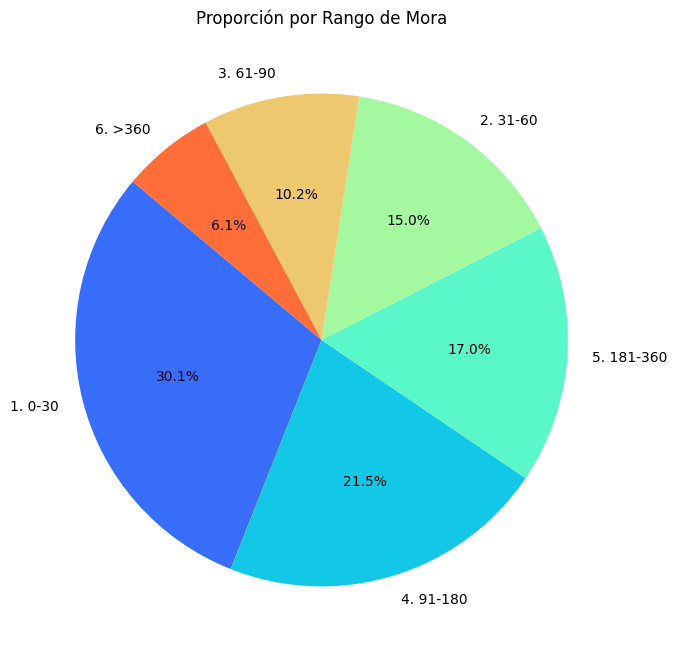

In [46]:
# Gráfico de pastel para Rango de Mora
rango_mora_counts = data['Rango_mora'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    rango_mora_counts,
    labels=rango_mora_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('rainbow')
)
plt.title('Proporción por Rango de Mora')
plt.show()


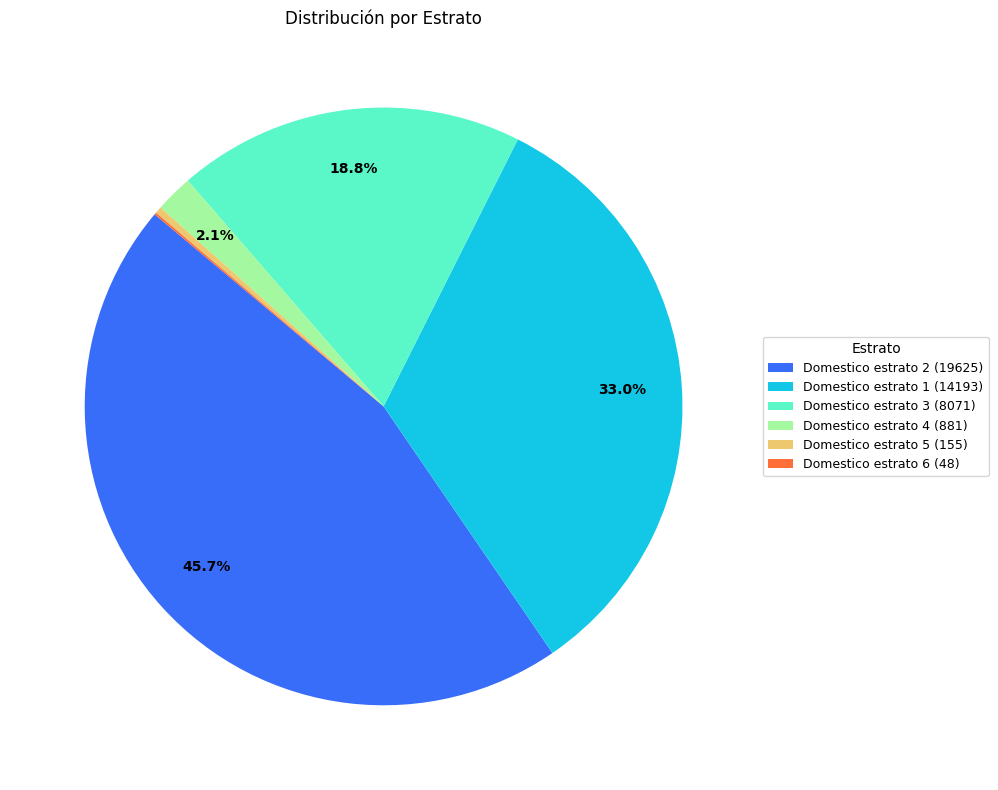

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que los datos se encuentran en la variable 'data'
estrato_counts = data['Estrato'].value_counts()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(12, 8))
patches, texts, autotexts = ax.pie(
    estrato_counts,
    labels=None,  # No mostrar etiquetas directamente en el gráfico
    autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',  # Mostrar solo porcentajes significativos
    startangle=140,
    colors=sns.color_palette('rainbow'),
    pctdistance=0.8  # Ajustar la posición de los porcentajes
)

# Crear etiquetas para la leyenda con los valores numéricos
labels = [f"{index} ({count})" for index, count in estrato_counts.items()]
ax.legend(
    patches, labels,
    title="Estrato",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# Ajustar el tamaño de la fuente de los porcentajes en el gráfico
plt.setp(autotexts, fontsize=10, weight="bold")

# Título del gráfico
plt.title('Distribución por Estrato')

# Ajustar automáticamente los márgenes del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


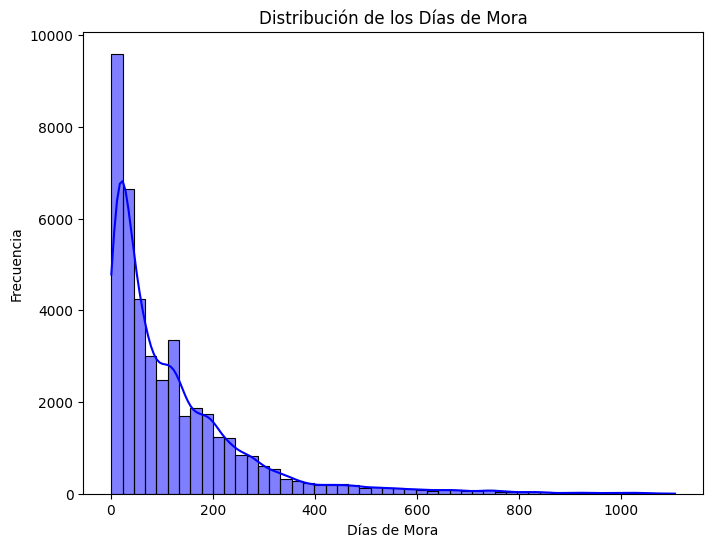

In [48]:
# Histograma de los días de mora
plt.figure(figsize=(8, 6))
sns.histplot(data['Dias_mora'], bins=50, kde=True, color='blue')
plt.title('Distribución de los Días de Mora')
plt.xlabel('Días de Mora')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-52-11d70e5821d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rango_mora', y='Valor_total', data=data, palette='Set2')  # Cambié data1 a data


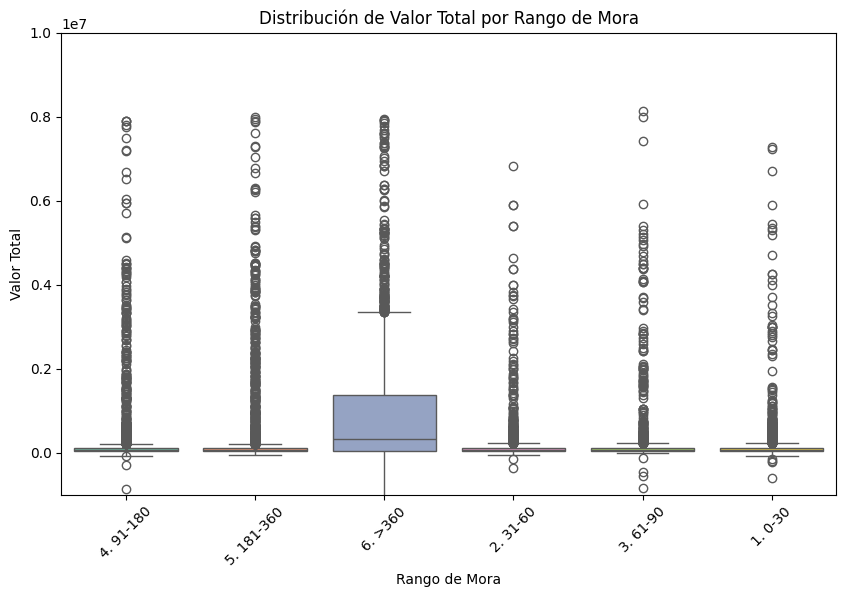

In [52]:
# Boxplot de Valor Total por Rango de Mora
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rango_mora', y='Valor_total', data=data, palette='Set2')  # Cambié data1 a data
plt.title('Distribución de Valor Total por Rango de Mora')
plt.xlabel('Rango de Mora')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x
plt.ylim(-1e6, 1e7)  # Ajuste para ignorar outliers extremos (puedes modificar según sea necesario)
plt.show()


<ipython-input-55-6f9bbbe678bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Estrato', data=data, order=data['Estrato'].value_counts().index, palette='coolwarm')


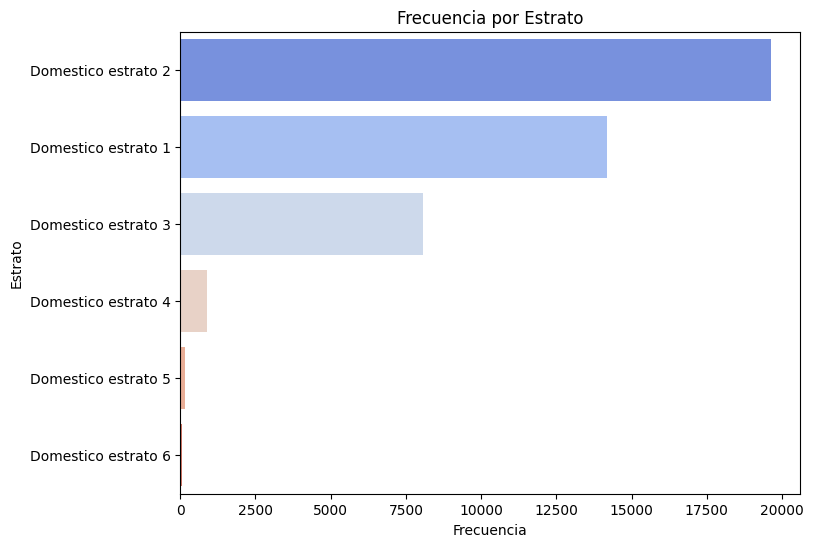

In [55]:
# Gráfico de barras para Estrato
plt.figure(figsize=(8, 6))
sns.countplot(y='Estrato', data=data, order=data['Estrato'].value_counts().index, palette='coolwarm')
plt.title('Frecuencia por Estrato')
plt.xlabel('Frecuencia')
plt.ylabel('Estrato')
plt.show()


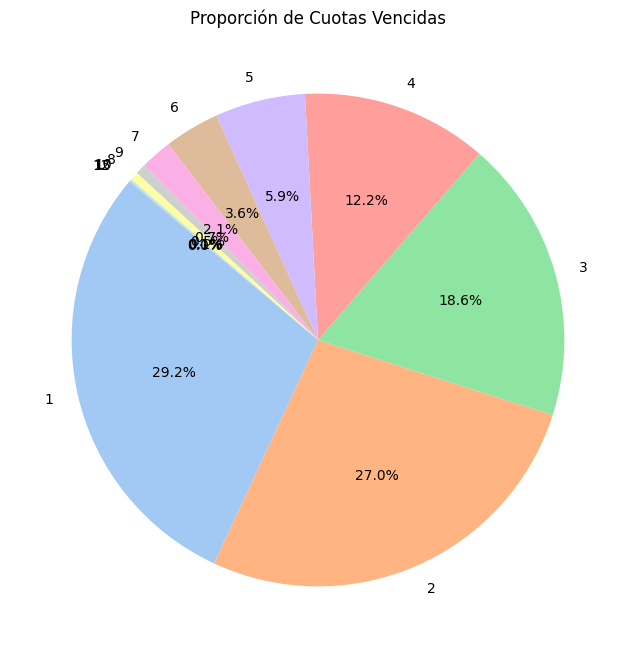

In [57]:
# Gráfico de pastel para CUOTAS_VENCIDA
cuotas_vencidas = data['CUOTAS_VENCIDA'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cuotas_vencidas, labels=cuotas_vencidas.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de Cuotas Vencidas')
plt.show()


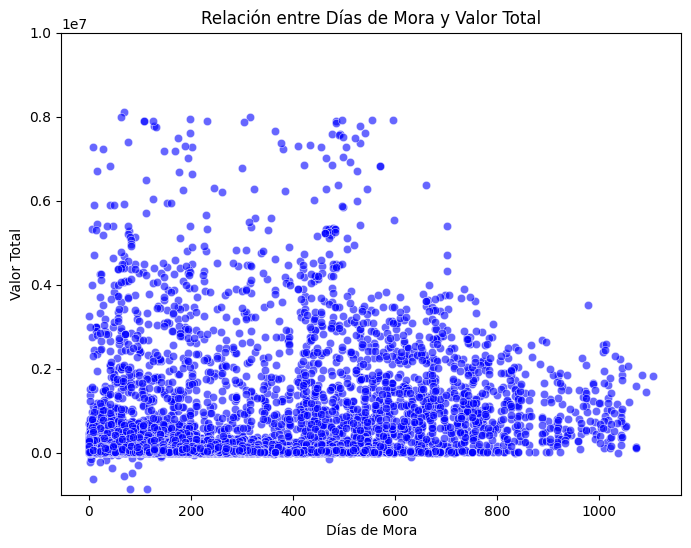

In [61]:
# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dias_mora', y='Valor_total', data=data, alpha=0.6, color='blue')
plt.title('Relación entre Días de Mora y Valor Total')
plt.xlabel('Días de Mora')
plt.ylabel('Valor Total')
plt.ylim(-1e6, 1e7)  # Ajuste para ignorar outliers extremos
plt.show()


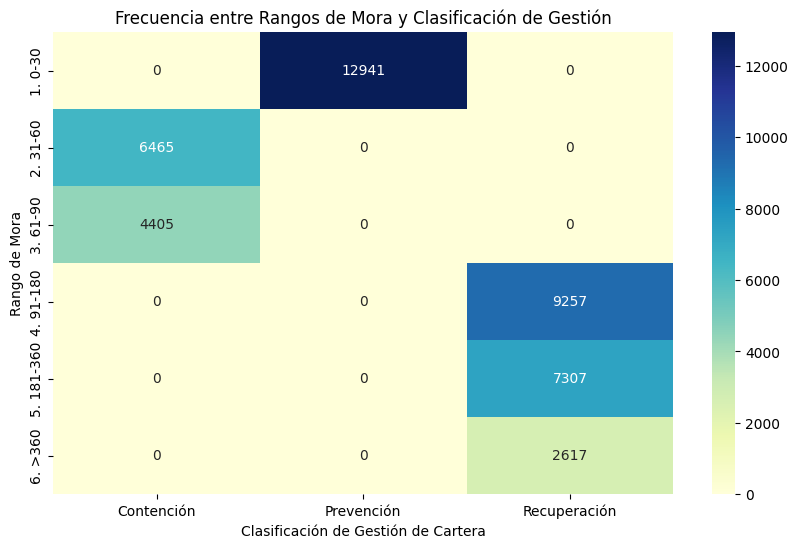

In [62]:
# Mapa de calor
tabla_contingencia = pd.crosstab(data['Rango_mora'], data['Clasificación_gestión_de_cartera'])
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frecuencia entre Rangos de Mora y Clasificación de Gestión')
plt.xlabel('Clasificación de Gestión de Cartera')
plt.ylabel('Rango de Mora')
plt.show()
